### Ektraksi Fitur

In [12]:
import cv2  # Mengimpor modul cv2 untuk pemrosesan gambar
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib untuk menampilkan gambar
import numpy as np  # Mengimpor modul numpy untuk operasi array
from skimage import data  # Mengimpor modul data dari skimage untuk mendapatkan gambar contoh
from skimage.color import rgb2hsv  # Mengimpor fungsi rgb2hsv untuk konversi warna dari RGB ke HSV
from skimage.feature import graycomatrix, graycoprops  # Mengimpor fungsi graycomatrix dan graycoprops untuk ekstraksi fitur dari gambar


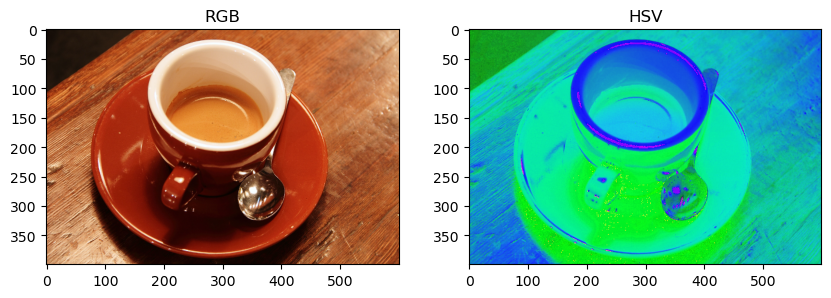

In [13]:
# Mendapatkan gambar contoh kopi dari skimage
img = data.coffee()

# Konversi gambar dari RGB ke HSV
img_hsv = rgb2hsv(img)

# Membuat subplot untuk menampilkan gambar asli (RGB) dan gambar dalam format HSV
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan gambar RGB di subplot pertama
axs[0].imshow(img)
axs[0].set_title('RGB')

# Menampilkan gambar HSV di subplot kedua
axs[1].imshow(img_hsv)
axs[1].set_title('HSV')

# Menampilkan plot
plt.show()


In [14]:
# Menghitung rata-rata dan deviasi standar dari nilai piksel dalam gambar HSV
mean = np.mean(img_hsv.ravel())  # Menghitung rata-rata nilai piksel dalam gambar HSV
std = np.std(img_hsv.ravel())    # Menghitung deviasi standar dari nilai piksel dalam gambar HSV

# Menampilkan nilai rata-rata dan deviasi standar
print(mean, std)


0.4684990654759933 0.35064790859628664


In [15]:
# Mengambil saluran kecerahan (V channel) dari gambar dalam format HSV
v_channel = img_hsv[:, :, 2]


In [16]:
# Normalisasi saluran kecerahan (V channel) ke rentang nilai 0-255
v_channel_normalized = (v_channel * 255).astype('uint8')


In [17]:
# Membuat matriks co-occurrence gray-level (GLCM) dari saluran kecerahan yang sudah dinormalisasi
glcm = graycomatrix(v_channel_normalized, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)


In [18]:
# Menghitung berbagai properti tekstur dari GLCM
contrast = graycoprops(glcm, 'contrast')[0, 0]          # Kontras
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]  # Disimilaritas
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]    # Homogenitas
energy = graycoprops(glcm, 'energy')[0, 0]              # Energi
correlation = graycoprops(glcm, 'correlation')[0, 0]    # Korelasi


In [19]:
# Mencetak nilai berbagai properti tekstur untuk ditampilkan
print(f'contrast  : {contrast}')         # Cetak nilai kontras
print(f'dissimilatarity  : {dissimilarity}')  # Cetak nilai disimilaritas
print(f'homogeneity  : {homogeneity}')    # Cetak nilai homogenitas
print(f'energy : {energy}')               # Cetak nilai energi
print(f'correlation : {correlation}')    # Cetak nilai korelasi


contrast  : 176.00779632721205
dissimilatarity  : 7.062245409015026
homogeneity  : 0.2808130195829467
energy : 0.024581015525638312
correlation : 0.9778693813152206
